Download

In [1]:
from google.colab import files
uploded=files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


2.Load Dataset

In [3]:
import pandas as pd
import numpy as np
ds=pd.read_csv('Mall_Customers.csv')
ds.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


3.Visualization

a.Univariate 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


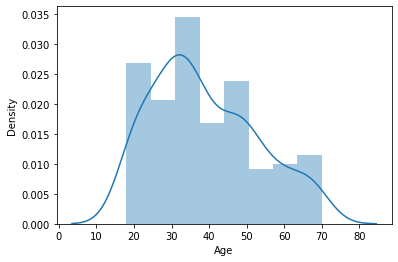

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
#univariate analysis
#distplot
sns.distplot(ds.Age)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


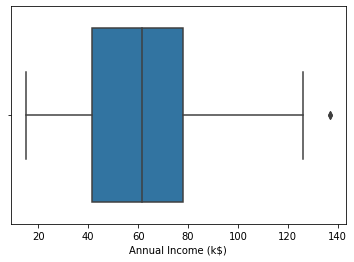

In [8]:
#boxplot
sns.boxplot(ds['Annual Income (k$)'])


b.bivariate

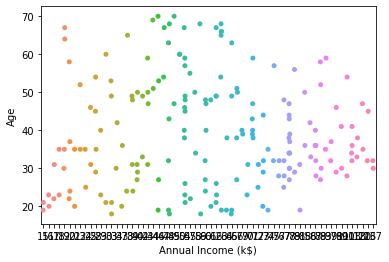

In [9]:
sns.stripplot(x=ds['Annual Income (k$)'],y=ds['Age'])

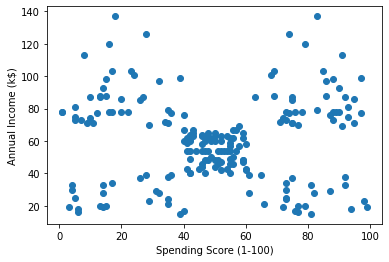

In [10]:
#scatterplot
plt.scatter(ds['Spending Score (1-100)'],ds['Annual Income (k$)'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

Multivariate

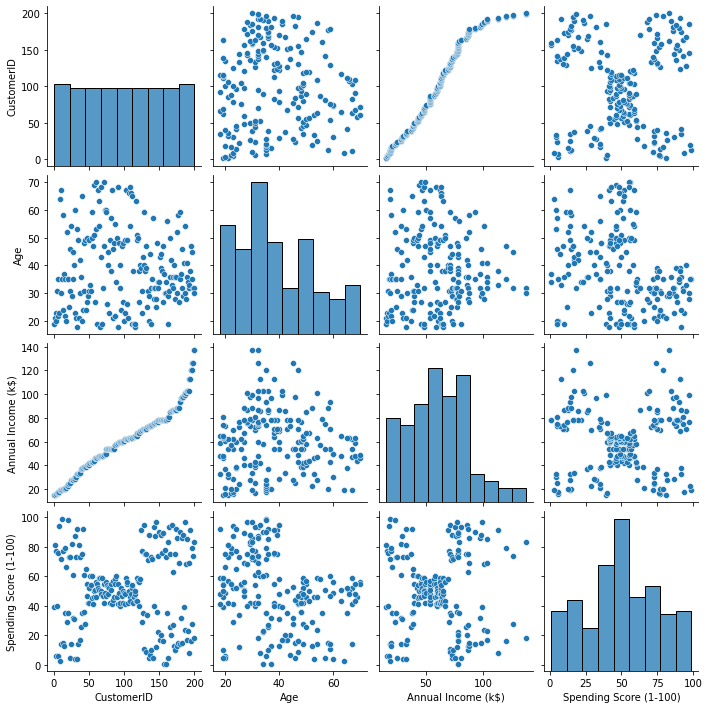

In [11]:
#pairplot
sns.pairplot(ds)

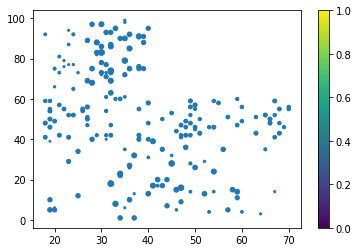

In [12]:
fig, ax = plt.subplots()
d = ax.scatter(ds['Age'],ds['Spending Score (1-100)'],ds['Annual Income (k$)'],marker = '.',cmap = 'plasma')
fig.colorbar(d)
plt.show()

4.Descriptive analysis

In [13]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [14]:
ds.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [15]:
ds.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [16]:
ds.mode()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,32.0,54.0,42.0
1,2,NaN,NaN,78.0,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


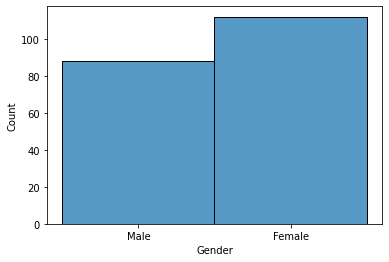

In [17]:
sns.histplot(ds['Gender'])

Null values

In [18]:
ds.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdf4e716f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdf4e6c6990>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdf500e7610>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdf4e6c2790>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdf4e6c2150>],
 'means': []}

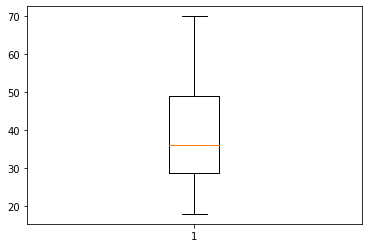

In [20]:
plt.boxplot(ds["Age"])

In [21]:
Quan1 = ds['Age'].quantile(0.25)
Quan3 = ds['Age'].quantile(0.75)
IQR = Quan3-Quan1
lower_limit = Quan1 - (1.5*IQR)
upper_limit = Quan3 + (1.5*IQR)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdf4e5ae990>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdf4e5b4450>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdf50061950>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdf4e5b4f10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdf4e5bb490>],
 'means': []}

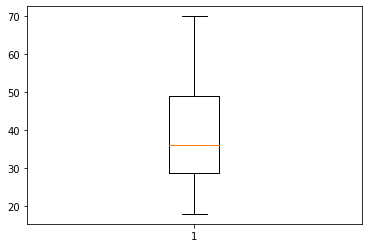

In [22]:
import numpy as np
ds["Age"] = np.where(ds["Age"]> upper_limit, upper_limit,
                        np.where(ds["Age"]< lower_limit, lower_limit,
                          ds["Age"]))
plt.boxplot(ds["Age"])

CATEGORICAL VARIABLE AND DECODING

In [23]:
numeric_data = ds.select_dtypes(include=[np.number]) 
categorical_data = ds.select_dtypes(exclude=[np.number]) 
print("Number of numerical variables: ", numeric_data.shape[1]) 
print("Number of categorical variables: ", categorical_data.shape[1])

Number of numerical variables:  4
Number of categorical variables:  1


In [24]:
print("Number of categorical variables: ", categorical_data.shape[1]) 
Categorical_variables = list(categorical_data.columns)
Categorical_variables

Number of categorical variables:  1


['Gender']

In [25]:
ds['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(ds['Gender'])
ds["Gender"] = label
ds['Gender'].value_counts()

0    112
1     88
Name: Gender, dtype: int64

INDEPENDENT AND DEPENDENT VARIABLE

In [28]:
X = ds.drop("Spending Score (1-100)",axis=1)
Y = ds['Spending Score (1-100)']
X[:5]

,CustomerID,Gender,Age,Annual Income (k$)
0,1,1,19.0,15
1,2,1,21.0,15
2,3,0,20.0,16
3,4,0,23.0,16
4,5,0,31.0,17


In [29]:
Y[:5]

0    39
1    81
2     6
3    77
4    40
Name: Spending Score (1-100), dtype: int64

SCALE INDEPENDENT VARIABLES

In [30]:
from sklearn.preprocessing import StandardScaler
object= StandardScaler()
scale = object.fit_transform(X) 
print(scale)

[[-1.7234121   1.12815215 -1.42456879 -1.73899919]
 [-1.70609137  1.12815215 -1.28103541 -1.73899919]
 [-1.68877065 -0.88640526 -1.3528021  -1.70082976]
 [-1.67144992 -0.88640526 -1.13750203 -1.70082976]
 [-1.6541292  -0.88640526 -0.56336851 -1.66266033]
 [-1.63680847 -0.88640526 -1.20926872 -1.66266033]
 [-1.61948775 -0.88640526 -0.27630176 -1.62449091]
 [-1.60216702 -0.88640526 -1.13750203 -1.62449091]
 [-1.5848463   1.12815215  1.80493225 -1.58632148]
 [-1.56752558 -0.88640526 -0.6351352  -1.58632148]
 [-1.55020485  1.12815215  2.02023231 -1.58632148]
 [-1.53288413 -0.88640526 -0.27630176 -1.58632148]
 [-1.5155634  -0.88640526  1.37433211 -1.54815205]
 [-1.49824268 -0.88640526 -1.06573534 -1.54815205]
 [-1.48092195  1.12815215 -0.13276838 -1.54815205]
 [-1.46360123  1.12815215 -1.20926872 -1.54815205]
 [-1.4462805  -0.88640526 -0.27630176 -1.50998262]
 [-1.42895978  1.12815215 -1.3528021  -1.50998262]
 [-1.41163905  1.12815215  0.94373197 -1.43364376]
 [-1.39431833 -0.88640526 -0.27

In [31]:
X_scaled  = pd.DataFrame(scale, columns = X.columns)
X_scaled

,CustomerID,Gender,Age,Annual Income (k$)
0,-1.723412,1.128152,-1.424569,-1.738999
1,-1.706091,1.128152,-1.281035,-1.738999
2,-1.688771,-0.886405,-1.352802,-1.700830
3,-1.671450,-0.886405,-1.137502,-1.700830
4,-1.654129,-0.886405,-0.563369,-1.662660
...,...,...,...,...
195,1.654129,-0.886405,-0.276302,2.268791
196,1.671450,-0.886405,0.441365,2.497807
197,1.688771,1.128152,-0.491602,2.497807
198,1.706091,1.128152,-0.491602,2.917671


TRAIN AND TEST SPLIT

In [32]:
from sklearn.model_selection import train_test_split
# split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.20, random_state=0)
X_train.shape

(160, 4)

In [33]:
X_test.shape

(40, 4)

In [34]:
Y_train.shape

(160,)

In [35]:
Y_test.shape

(40,)

BUILD THE MODEL

In [36]:
x = df.iloc[:, [3, 4]].values

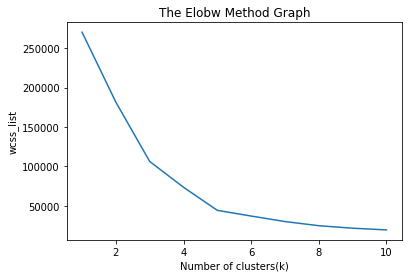

In [37]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()

clustering algorithm

In [38]:
#training the K-means model on a dataset  
kmeans = KMeans(n_clusters=5, init='k-means++', random_state= 42)  
y_predict= kmeans.fit_predict(x)

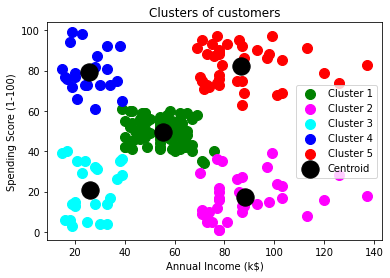

In [42]:
#visulaizing the clusters  
plt.scatter(x[y_predict == 0, 0], x[y_predict == 0, 1], s = 100, c = 'green', label = 'Cluster 1') #for first cluster  
plt.scatter(x[y_predict == 1, 0], x[y_predict == 1, 1], s = 100, c = 'magenta', label = 'Cluster 2') #for second cluster  
plt.scatter(x[y_predict== 2, 0], x[y_predict == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3') #for third cluster  
plt.scatter(x[y_predict == 3, 0], x[y_predict == 3, 1], s = 100, c = 'blue', label = 'Cluster 4') #for fourth cluster  
plt.scatter(x[y_predict == 4, 0], x[y_predict == 4, 1], s = 100, c = 'red', label = 'Cluster 5') #for fifth cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'black', label = 'Centroid')   
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()

# New Section